<a href="https://colab.research.google.com/github/Jorge-89/Data-Science-CoderHouse/blob/main/Titanic_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El RMS Titanic​ 
Fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que se hundió durante la noche del 14 y la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1496 personas de las 2208 que iban a bordo, lo que convierte a esta catástrofe en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

Fuente: Wikipedia


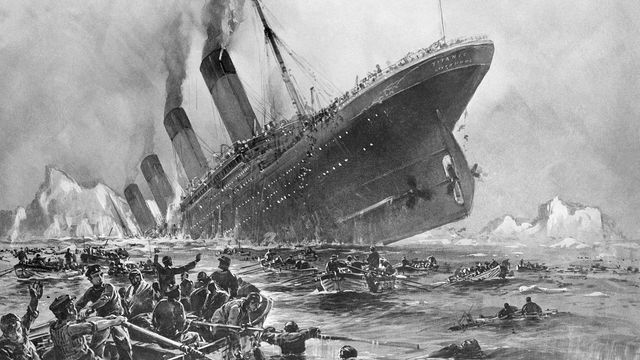

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:

#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Data-Science-CoderHouse/main/train.csv'
df = pd.read_csv(url, sep =",")



In [42]:
# muestra las columnas del df
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Datos**

**Veamos cada columna:**

**PassengerId:** Identificador de pasajero

**Survived**: 0 = No sobrevivió, 1 = sobrevivió 

**Pclass:** Clase, donde 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.

**Sex:** Masculino o Femenino

**Age:** Edad en años, en fracción si es menor de 1

**SibSp:** Número de hermanos o cónyuges a bordo del titanic

**Parch:** Número de padres o hijos a bordo del titanic

**Ticket:** Número de ticket de pasajero

**Fare:** Tarifa de pasajero

**Cabin:** Número de cabina

**Embarked:** Punto de embarque, donde C = Cherbourg, Q = Queenstown, S = Southampton

In [43]:
#muestra las primeras 5 filas del df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#muestra las últimas 5 filas del df
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [33]:

#observamos la cantidad de datos  por cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


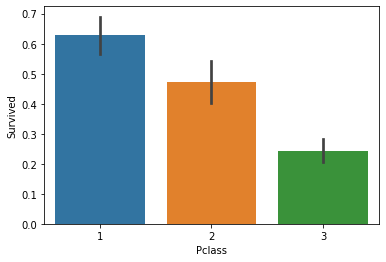

In [54]:
df_sobrevive = df[df['Survived'] == 1]

sns.barplot(x='Pclass', y='Survived', data=df)



Cantidad de mujeres: 314
Cantidad de hombres 577


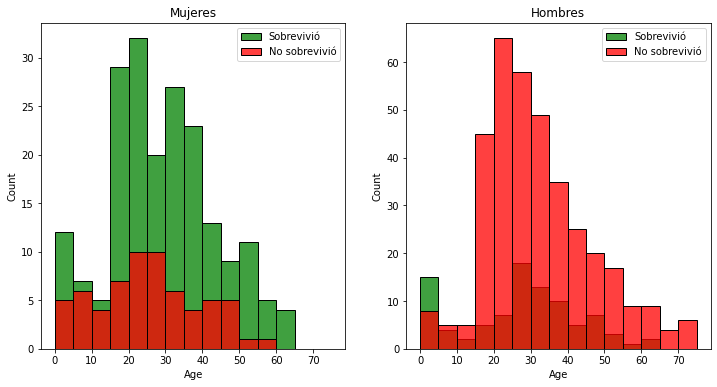

In [56]:

#primer análisis, estámos ignorando las edades faltantes

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

print("Cantidad de mujeres:", len(women))
print("Cantidad de hombres", len(men))


ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=np.arange(0, 80, 5), label = "Sobrevivió", color='green', ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=np.arange(0, 80, 5), label = "No sobrevivió", color='red', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Mujeres')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=np.arange(0, 80, 5), label = "Sobrevivió",  color='green',ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=np.arange(0, 80, 5), label = "No sobrevivió",  color='red',ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Hombres')